In [266]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [267]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [268]:
print("Size of training set :",len(X_train), "and size of test set is :", len(X_test))
print("Size of an image is :",X_train[0].shape)

Size of training set : 60000 and size of test set is : 10000
Size of an image is : (28, 28)


Here is the image  0
Here is the image  1


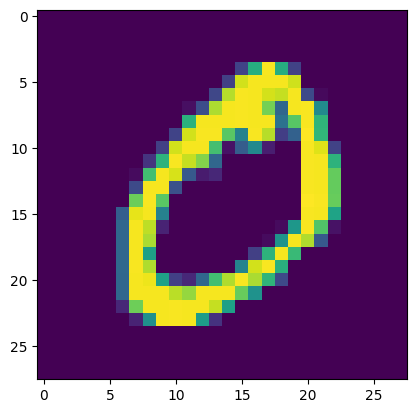

In [269]:
for i in range(0,2):
    print("Here is the image ",i)
    plt.imshow(X_train[i])

In [270]:
X_train = X_train / 255
X_test =  X_test / 255

In [271]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened  = X_test.reshape(len(X_test), 28*28)
print("Updated shape of train : ", X_train_flattened.shape, "and test: ", X_test_flattened.shape)

Updated shape of train :  (60000, 784) and test:  (10000, 784)


In [272]:
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,),  activation= 'relu'), #need not specify input shape as peeche wali line mein we have specified
    keras.layers.Dense(32, input_shape=(128,), activation='relu'),
    keras.layers.Dense(10, input_shape = (32,),activation= 'softmax') #again, no need to specify
])

In [273]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               100480    
                                                                 
 dense_37 (Dense)            (None, 32)                4128      
                                                                 
 dense_38 (Dense)            (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [274]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [275]:
history = model.fit(X_train_flattened, Y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2969 - accuracy: 0.9135 - val_loss: 0.1576 - val_accuracy: 0.9523
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1250 - accuracy: 0.9627 - val_loss: 0.1202 - val_accuracy: 0.9642
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0869 - accuracy: 0.9737 - val_loss: 0.1059 - val_accuracy: 0.9690
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0652 - accuracy: 0.9796 - val_loss: 0.1024 - val_accuracy: 0.9711
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0510 - accuracy: 0.9840 - val_loss: 0.0893 - val_accuracy: 0.9751
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0396 - accuracy: 0.9875 - val_loss: 0.1030 - val_accuracy: 0.9726
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0331 - accuracy: 0.9887 - val_loss: 0.1012 - val_accuracy:

In [276]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1087 - accuracy: 0.9783


[0.10869351774454117, 0.9782999753952026]

In [277]:
model.predict(X_test_flattened)

313/313 [==============================] - 1s 1ms/step


array([[4.4189279e-12, 4.0866882e-10, 1.0308623e-08, ..., 9.9998319e-01,
        3.2715196e-13, 9.6381847e-10],
       [4.5539342e-21, 6.5620276e-07, 9.9999928e-01, ..., 2.2599713e-24,
        2.4296190e-12, 5.1009487e-26],
       [1.7853556e-10, 9.9998128e-01, 1.8374261e-05, ..., 9.9191197e-08,
        2.3441462e-08, 7.5092337e-14],
       ...,
       [4.1489257e-27, 1.2286187e-23, 2.7030136e-27, ..., 1.7276129e-17,
        2.4573969e-20, 1.6690809e-13],
       [5.5318022e-16, 4.3922364e-13, 1.9660844e-16, ..., 9.7693888e-17,
        5.6815843e-08, 4.0947238e-21],
       [1.1557876e-17, 3.5988967e-17, 5.3325783e-17, ..., 7.3925090e-19,
        2.4489839e-20, 3.9114165e-22]], dtype=float32)

In [278]:
y_predict = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [279]:
np.argmax(y_predict[1])

2

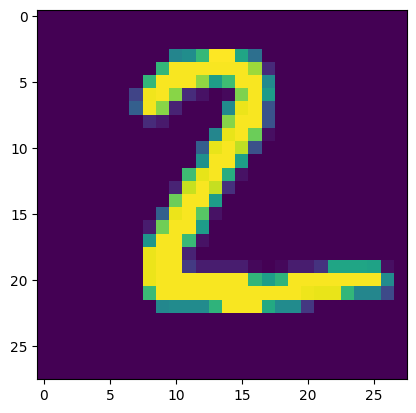

In [280]:
plt.imshow(X_test[1])

In [281]:
y_predict = y_predict.argmax(axis=1)

In [282]:
print("The first five predictions by model are :",y_predict[:5], "And the actual answers are :",Y_test[:5])


The first five predictions by model are : [7 2 1 0 4] And the actual answers are : [7 2 1 0 4]


In [283]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_predict)

0.9783

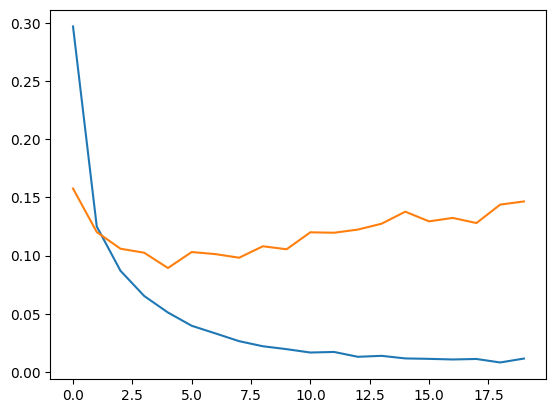

In [290]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

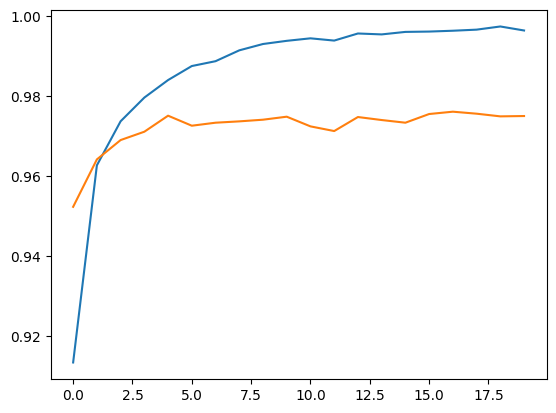

In [289]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [285]:
confMat = tf.math.confusion_matrix(labels=Y_test, predictions=y_predict)
confMat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    4,    1,    1,    3,    4,    1,    2,    1],
       [   0, 1125,    0,    1,    0,    1,    3,    1,    3,    1],
       [   2,    0, 1002,    5,    5,    1,    4,    5,    8,    0],
       [   0,    1,    1,  994,    0,    5,    0,    3,    3,    3],
       [   1,    1,    4,    0,  963,    0,    3,    1,    0,    9],
       [   3,    0,    0,    9,    1,  873,    1,    1,    2,    2],
       [   2,    2,    0,    0,    8,    3,  943,    0,    0,    0],
       [   0,    4,    7,    3,    5,    0,    1,  995,    8,    5],
       [   3,    0,    2,    5,    3,    4,    2,    4,  948,    3],
       [   5,    3,    0,    3,    6,    3,    1,    8,    3,  977]])>

Text(95.72222222222221, 0.5, 'Truth')

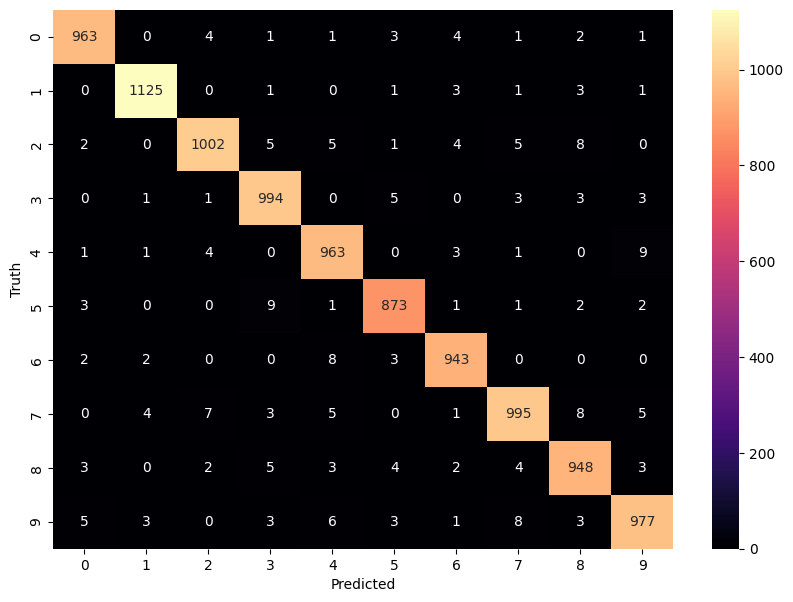

In [286]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(confMat, cmap='magma', annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')